In [1003]:
import pandas as pd
import requests

import os
#i'll be adding my API Key here when needed
census_key = os.getenv('Write the API KEY HERE')

In [1004]:
url = 'https://api.census.gov/data/2020/acs/acs5?'
params = {'get' : 'NAME,B01001_001E,B02001_004E,B02001_005E,B01001H_001E,B01001B_001E,B01001I_001E',
          'for' : 'state:*'}

r = requests.get(url, params=params)
print(r.url)

https://api.census.gov/data/2020/acs/acs5?get=NAME%2CB01001_001E%2CB02001_004E%2CB02001_005E%2CB01001H_001E%2CB01001B_001E%2CB01001I_001E&for=state%3A%2A


In [1005]:
census_df = pd.DataFrame(r.json()[1:], columns=r.json()[0])

census_df.head(10)

,NAME,B01001_001E,B02001_004E,B02001_005E,B01001H_001E,B01001B_001E,B01001I_001E,state
0,Pennsylvania,12794885,20798,449320,9685118,1419582,971813,42
1,California,39346023,311629,5834312,14365145,2250962,15380929,06
2,West Virginia,1807426,3146,14228,1654681,64285,28679,54
3,Utah,3151239,33222,73190,2455192,38059,446067,49
4,New York,19514849,76535,1674216,10766297,3002401,3720707,36
5,District of Columbia,701974,2438,28762,257792,318631,77981,11
6,Alaska,736990,107298,47289,439979,23894,53059,02
7,Florida,21216924,55655,590668,11331222,3381061,5468826,12
8,South Carolina,5091517,16951,83573,3230111,1346560,296897,45
9,North Dakota,760394,39165,11979,636284,23959,30325,38


In [1006]:
census_df = (census_df
             .rename(
                 columns={'NAME' : 'State Name',
                          'B01001_001E' : 'Total Population',
                          'B02001_004E' : 'Native',
                          'B02001_005E' : 'Asian',
                          'B01001H_001E' : 'White',
                          'B01001B_001E' : 'Black',
                          'B01001I_001E' : 'Hispanic'
                         }
             ).set_index('State Name'))

In [1007]:
census_df.head(10)

,Total Population,Native,Asian,White,Black,Hispanic,state
State Name,,,,,,,
Pennsylvania,12794885,20798,449320,9685118,1419582,971813,42
California,39346023,311629,5834312,14365145,2250962,15380929,06
West Virginia,1807426,3146,14228,1654681,64285,28679,54
Utah,3151239,33222,73190,2455192,38059,446067,49
New York,19514849,76535,1674216,10766297,3002401,3720707,36
District of Columbia,701974,2438,28762,257792,318631,77981,11
Alaska,736990,107298,47289,439979,23894,53059,02
Florida,21216924,55655,590668,11331222,3381061,5468826,12
South Carolina,5091517,16951,83573,3230111,1346560,296897,45


In [1008]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Pennsylvania to Tennessee
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Total Population  52 non-null     object
 1   Native            52 non-null     object
 2   Asian             52 non-null     object
 3   White             52 non-null     object
 4   Black             52 non-null     object
 5   Hispanic          52 non-null     object
 6   state             52 non-null     object
dtypes: object(7)
memory usage: 3.2+ KB


In [1009]:
census_df['Total Population'] = census_df['Total Population'].astype(int)

In [1010]:
census_df['Native'] = census_df['Native'].astype(int)

In [1011]:
census_df['Black'] = census_df['Black'].astype(int)

In [1012]:
census_df['White'] = census_df['White'].astype(int)

In [1013]:
census_df['Hispanic'] = census_df['Hispanic'].astype(int)

In [1014]:
census_df['Asian'] = census_df['Asian'].astype(int)

In [1015]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Pennsylvania to Tennessee
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Total Population  52 non-null     int64 
 1   Native            52 non-null     int64 
 2   Asian             52 non-null     int64 
 3   White             52 non-null     int64 
 4   Black             52 non-null     int64 
 5   Hispanic          52 non-null     int64 
 6   state             52 non-null     object
dtypes: int64(6), object(1)
memory usage: 3.2+ KB


In [1016]:
census_df.sort_values(by='Total Population')

,Total Population,Native,Asian,White,Black,Hispanic,state
State Name,,,,,,,
Wyoming,581348,13117,4892,485816,5079,58854,56
Vermont,624340,1873,10126,576601,7964,12518,50
District of Columbia,701974,2438,28762,257792,318631,77981,11
Alaska,736990,107298,47289,439979,23894,53059,02
North Dakota,760394,39165,11979,636284,23959,30325,38
South Dakota,879336,74975,12413,715328,18836,36088,46
Delaware,967679,3560,38528,595236,212795,91350,10
Rhode Island,1057798,4344,36536,755708,69196,168007,44
Montana,1061705,65523,8664,908782,5919,41501,30


In [1017]:
census_df['Others'] = census_df['Total Population']-(census_df['Asian']+census_df['Black']+census_df['White']+census_df['Hispanic']+census_df['Native'])

In [1018]:
census_df.head(10)

,Total Population,Native,Asian,White,Black,Hispanic,state,Others
State Name,,,,,,,,
Pennsylvania,12794885,20798,449320,9685118,1419582,971813,42,248254
California,39346023,311629,5834312,14365145,2250962,15380929,06,1203046
West Virginia,1807426,3146,14228,1654681,64285,28679,54,42407
Utah,3151239,33222,73190,2455192,38059,446067,49,105509
New York,19514849,76535,1674216,10766297,3002401,3720707,36,274693
District of Columbia,701974,2438,28762,257792,318631,77981,11,16370
Alaska,736990,107298,47289,439979,23894,53059,02,65471
Florida,21216924,55655,590668,11331222,3381061,5468826,12,389492
South Carolina,5091517,16951,83573,3230111,1346560,296897,45,117425


In [1019]:
population = census_df['Total Population']

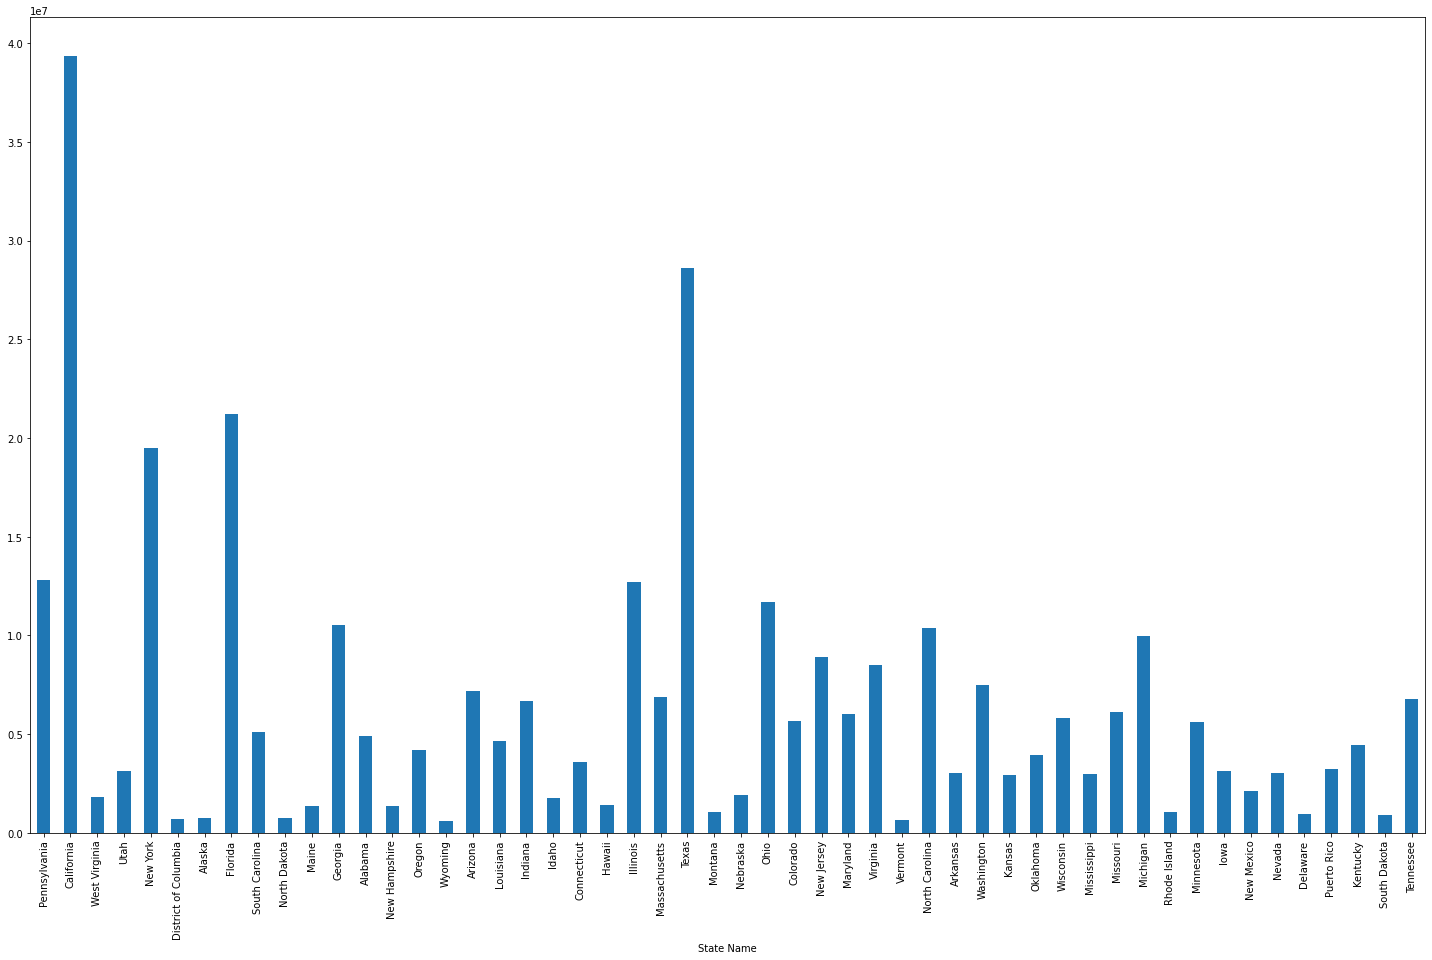

In [1020]:
population.plot.bar(figsize=(25,15))

In [1021]:
columns = ['Native','Asian','White','Black','Hispanic','Others']

In [1022]:
for col in columns:
  census_df[col + ' percent'] = (census_df[col]/census_df['Total Population'])*100

In [1023]:
census_df

,Total Population,Native,Asian,White,Black,Hispanic,state,Others,Native percent,Asian percent,White percent,Black percent,Hispanic percent,Others percent
State Name,,,,,,,,,,,,,,
Pennsylvania,12794885,20798,449320,9685118,1419582,971813,42,248254,0.162549,3.511716,75.695233,11.094918,7.595324,1.940260
California,39346023,311629,5834312,14365145,2250962,15380929,06,1203046,0.792022,14.828213,36.509776,5.720939,39.091445,3.057605
West Virginia,1807426,3146,14228,1654681,64285,28679,54,42407,0.174060,0.787197,91.549032,3.556715,1.586732,2.346265
Utah,3151239,33222,73190,2455192,38059,446067,49,105509,1.054252,2.322579,77.911958,1.207747,14.155289,3.348175
New York,19514849,76535,1674216,10766297,3002401,3720707,36,274693,0.392189,8.579190,55.169768,15.385213,19.066030,1.407610
District of Columbia,701974,2438,28762,257792,318631,77981,11,16370,0.347306,4.097303,36.723867,45.390712,11.108816,2.331995
Alaska,736990,107298,47289,439979,23894,53059,02,65471,14.558949,6.416505,59.699453,3.242106,7.199419,8.883567
Florida,21216924,55655,590668,11331222,3381061,5468826,12,389492,0.262314,2.783947,53.406526,15.935679,25.775772,1.835761
South Carolina,5091517,16951,83573,3230111,1346560,296897,45,117425,0.332926,1.641416,63.441033,26.447128,5.831209,2.306287


In [1024]:
temp_df = census_df[['Native percent',	'Asian percent',	'White percent'	,'Black percent',	'Hispanic percent'	,'Others percent']]

In [1025]:
temp_df[temp_df < 0] = 0

<ipython-input-1025-00792fc534c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[temp_df < 0] = 0
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


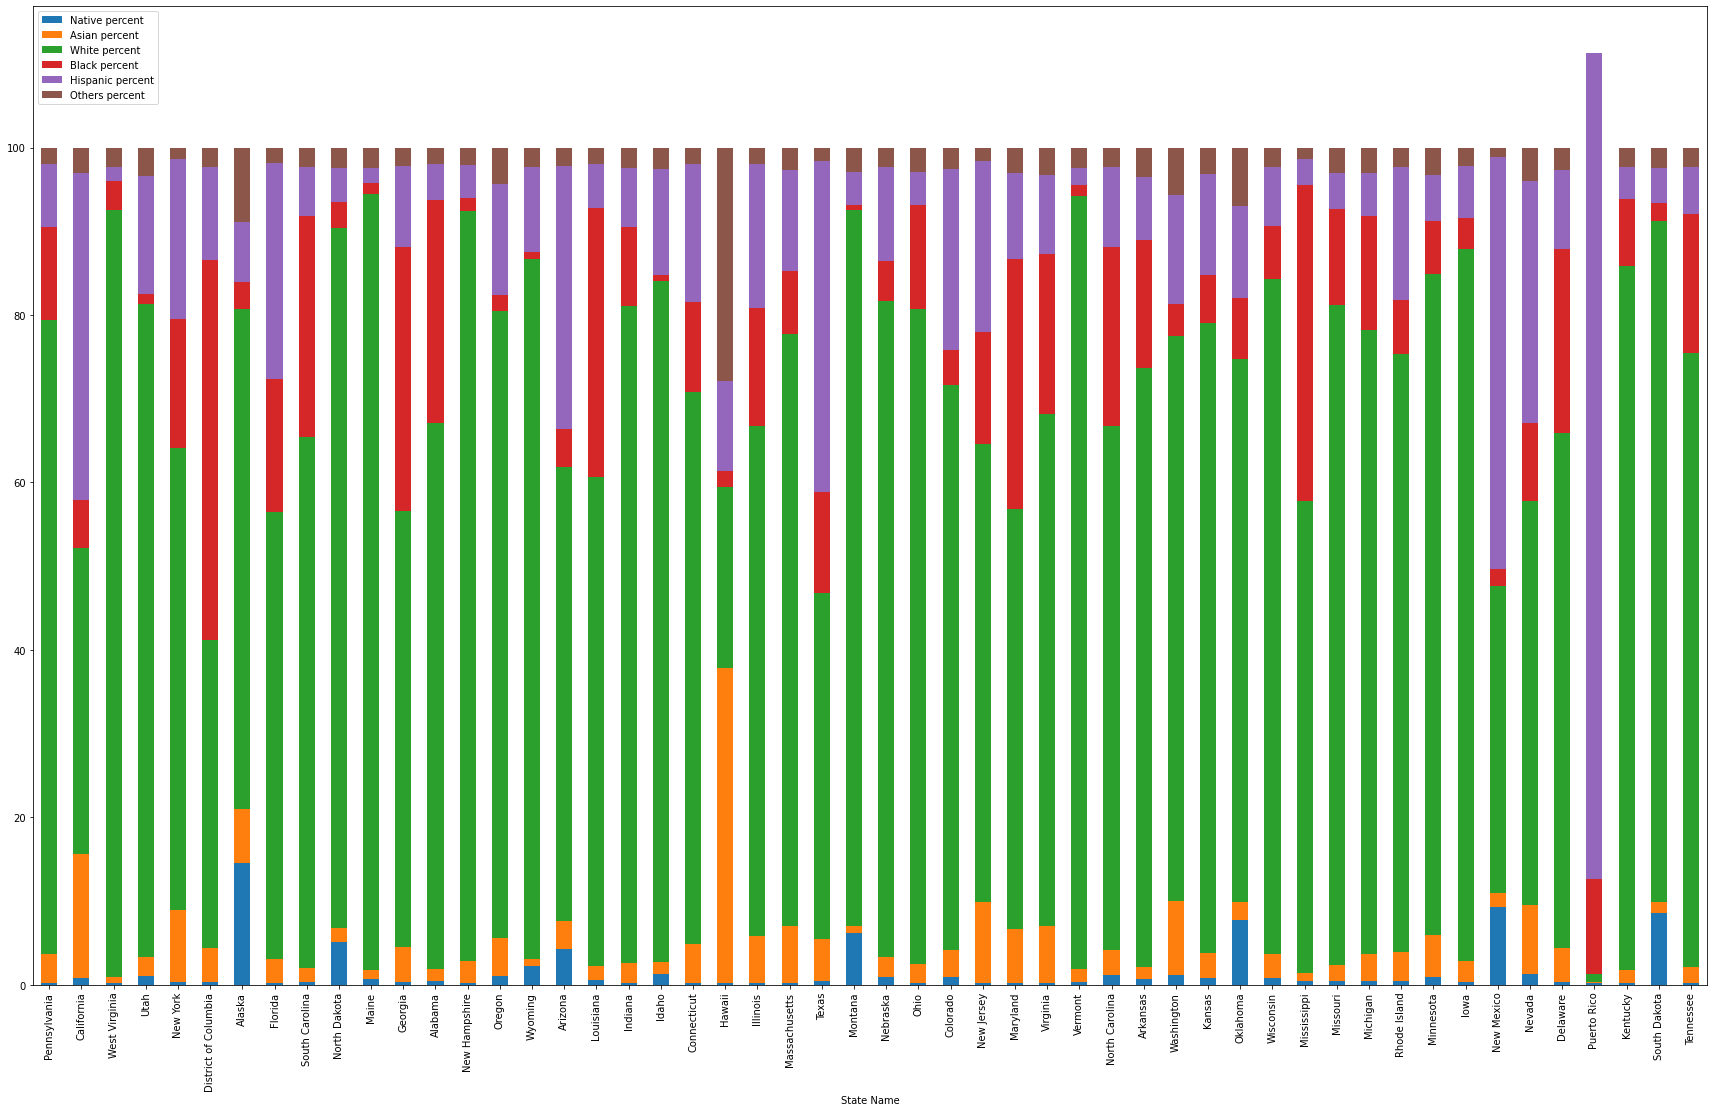

In [1026]:
a = temp_df.plot.bar(width=0.5,figsize=(30,18),stacked=True)

In [1027]:
census_df.sum()

Total Population                                            329824950
Native                                                        2694311
Asian                                                        18427519
White                                                       196283090
Black                                                        41595290
Hispanic                                                     62573645
state               4206544936110212453823130133415604221816091517...
Others                                                        8251095
Native percent                                              80.812478
Asian percent                                              220.013781
White percent                                             3446.587145
Black percent                                               584.22357
Hispanic percent                                           713.708784
Others percent                                             154.654242
dtype: object

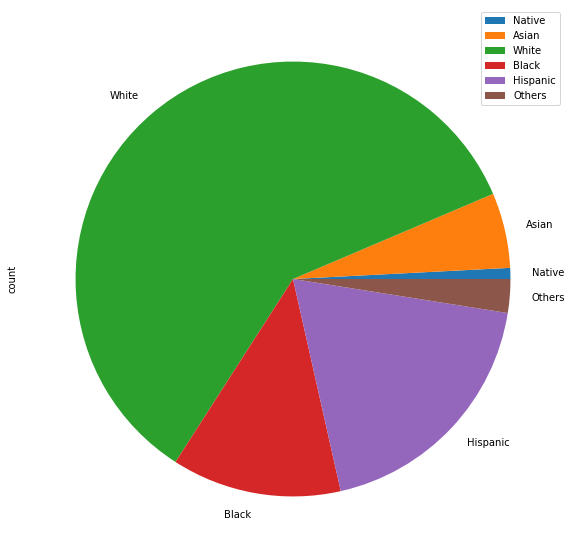

In [1028]:
df = pd.DataFrame({'count': [census_df.sum()[1],census_df.sum()[2],census_df.sum()[3],census_df.sum()[4],census_df.sum()[5],census_df.sum()[7]]},index=['Native', 'Asian', 'White','Black','Hispanic','Others'])
plot = df.plot.pie(y='count', figsize=(10, 10))

In [1029]:
peopleAndPercentage = pd.DataFrame({'percentage': [census_df.sum()[1]*100/census_df.sum()[0],census_df.sum()[2]*100/census_df.sum()[0],census_df.sum()[3]*100/census_df.sum()[0],census_df.sum()[4]*100/census_df.sum()[0],census_df.sum()[5]*100/census_df.sum()[0],census_df.sum()[7]*100/census_df.sum()[0]]},index=['Native', 'Asian', 'White','Black','Hispanic','Others'])

In [1030]:
peopleAndPercentage

,percentage
Native,0.816891
Asian,5.587060
White,59.511292
Black,12.611323
Hispanic,18.971774
Others,2.501659


In [1031]:
df1=pd.read_csv('/content/US Police shootings in from 2015-22.csv')

In [1032]:
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [1033]:
df1

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,7678,NaN,2022-08-23,shot,unknown weapon,NaN,M,NaN,Harris County,TX,False,other,Foot,False,-95.479,29.963,True
7678,7679,NaN,2022-08-23,shot,machete,48.0,M,NaN,San Diego,CA,False,other,Not fleeing,False,-117.108,32.723,True
7679,7680,Geraldo Reyes,2022-08-23,shot,gun,32.0,M,NaN,Cut Off,LA,False,attack,NaN,False,-90.312,29.458,True
7680,7681,NaN,2022-08-23,shot,gun,NaN,M,NaN,Blue Springs,MO,False,attack,Foot,False,-94.258,39.023,True


In [1034]:
df2=df1.replace({"state": states})

In [1035]:
df2

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,Washington,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,Oregon,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,Kansas,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,California,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,Colorado,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,7678,NaN,2022-08-23,shot,unknown weapon,NaN,M,NaN,Harris County,Texas,False,other,Foot,False,-95.479,29.963,True
7678,7679,NaN,2022-08-23,shot,machete,48.0,M,NaN,San Diego,California,False,other,Not fleeing,False,-117.108,32.723,True
7679,7680,Geraldo Reyes,2022-08-23,shot,gun,32.0,M,NaN,Cut Off,Louisiana,False,attack,NaN,False,-90.312,29.458,True
7680,7681,NaN,2022-08-23,shot,gun,NaN,M,NaN,Blue Springs,Missouri,False,attack,Foot,False,-94.258,39.023,True


In [1036]:
stateAndDate = df2[['date','state']]
stateList = [i for i in stateAndDate['state']]

In [1037]:
stateCounts = []
for state in df2['state'].unique():
    stateCounts.append([stateList.count(state),state])
print(stateCounts)

[[208, 'Washington'], [125, 'Oregon'], [71, 'Kansas'], [1110, 'California'], [278, 'Colorado'], [211, 'Oklahoma'], [349, 'Arizona'], [47, 'Iowa'], [159, 'Pennsylvania'], [690, 'Texas'], [219, 'Ohio'], [154, 'Louisiana'], [48, 'Montana'], [88, 'Utah'], [109, 'Arkansas'], [155, 'Illinois'], [124, 'Nevada'], [165, 'New Mexico'], [86, 'Minnesota'], [198, 'Missouri'], [134, 'Virginia'], [87, 'New Jersey'], [140, 'Indiana'], [141, 'Kentucky'], [54, 'Massachusetts'], [22, 'New Hampshire'], [493, 'Florida'], [62, 'Idaho'], [107, 'Maryland'], [38, 'Nebraska'], [129, 'Michigan'], [289, 'Georgia'], [208, 'Tennessee'], [218, 'North Carolina'], [52, 'Alaska'], [140, 'New York'], [33, 'Maine'], [145, 'Alabama'], [98, 'Mississippi'], [115, 'Wisconsin'], [124, 'South Carolina'], [17, 'Delaware'], [24, 'District of Columbia'], [71, 'West Virginia'], [37, 'Hawaii'], [25, 'Wyoming'], [18, 'North Dakota'], [22, 'Connecticut'], [27, 'South Dakota'], [12, 'Vermont'], [6, 'Rhode Island']]


In [1038]:
stateCounts.sort(reverse=True)

In [1039]:
print(stateCounts)

[[1110, 'California'], [690, 'Texas'], [493, 'Florida'], [349, 'Arizona'], [289, 'Georgia'], [278, 'Colorado'], [219, 'Ohio'], [218, 'North Carolina'], [211, 'Oklahoma'], [208, 'Washington'], [208, 'Tennessee'], [198, 'Missouri'], [165, 'New Mexico'], [159, 'Pennsylvania'], [155, 'Illinois'], [154, 'Louisiana'], [145, 'Alabama'], [141, 'Kentucky'], [140, 'New York'], [140, 'Indiana'], [134, 'Virginia'], [129, 'Michigan'], [125, 'Oregon'], [124, 'South Carolina'], [124, 'Nevada'], [115, 'Wisconsin'], [109, 'Arkansas'], [107, 'Maryland'], [98, 'Mississippi'], [88, 'Utah'], [87, 'New Jersey'], [86, 'Minnesota'], [71, 'West Virginia'], [71, 'Kansas'], [62, 'Idaho'], [54, 'Massachusetts'], [52, 'Alaska'], [48, 'Montana'], [47, 'Iowa'], [38, 'Nebraska'], [37, 'Hawaii'], [33, 'Maine'], [27, 'South Dakota'], [25, 'Wyoming'], [24, 'District of Columbia'], [22, 'New Hampshire'], [22, 'Connecticut'], [18, 'North Dakota'], [17, 'Delaware'], [12, 'Vermont'], [6, 'Rhode Island']]


In [1040]:
for states in census_df.index:
  print((stateList.count(states)/census_df.at[states,'Total Population'])*100)

0.0012426840882118128
0.0028211237511857295
0.003928238279188193
0.002792552389710841
0.0007174024251993956
0.0034189300458421536
0.0070557266720036906
0.002323616750477119
0.0024354234700581377
0.002367193849504336
0.0024611712937930006
0.0027480419250404528
0.00296330448096598
0.0016233239180546085
0.00299304703202273
0.004300350220521959
0.004864746118796822
0.0033014507517874995
0.002090521679232444
0.003534038202952974
0.0006161517458519684
0.0026054980233424455
0.0012189210519776247
0.0007856827648700284
0.002409601360439975
0.004521029852925247
0.0019752306081735043
0.0018757588151028562
0.004890125218868284
0.0009791323266952665
0.0017722203303816202
0.0015747368955448815
0.0019220296633244707
0.0020989335203245607
0.0036190104961264964
0.0027687317012458626
0.002437668641178266
0.005342662144731958
0.001980377046568997
0.0032865668288151427
0.0032330964573100635
0.0012933748028731368
0.0005672160469201114
0.0015356687641044926
0.0014920582817012386
0.00786830460925284
0.004092

In [1041]:
for states in census_df.index:
  print(((stateList.count(states)/census_df.at[states,'Total Population'])*100))
  census_df.at[states,'safty ratio'] = ((stateList.count(states)/census_df.at[states,'Total Population'])*100)

0.0012426840882118128
0.0028211237511857295
0.003928238279188193
0.002792552389710841
0.0007174024251993956
0.0034189300458421536
0.0070557266720036906
0.002323616750477119
0.0024354234700581377
0.002367193849504336
0.0024611712937930006
0.0027480419250404528
0.00296330448096598
0.0016233239180546085
0.00299304703202273
0.004300350220521959
0.004864746118796822
0.0033014507517874995
0.002090521679232444
0.003534038202952974
0.0006161517458519684
0.0026054980233424455
0.0012189210519776247
0.0007856827648700284
0.002409601360439975
0.004521029852925247
0.0019752306081735043
0.0018757588151028562
0.004890125218868284
0.0009791323266952665
0.0017722203303816202
0.0015747368955448815
0.0019220296633244707
0.0020989335203245607
0.0036190104961264964
0.0027687317012458626
0.002437668641178266
0.005342662144731958
0.001980377046568997
0.0032865668288151427
0.0032330964573100635
0.0012933748028731368
0.0005672160469201114
0.0015356687641044926
0.0014920582817012386
0.00786830460925284
0.004092

In [1042]:
census_df

,Total Population,Native,Asian,White,Black,Hispanic,state,Others,Native percent,Asian percent,White percent,Black percent,Hispanic percent,Others percent,safty ratio
State Name,,,,,,,,,,,,,,,
Pennsylvania,12794885,20798,449320,9685118,1419582,971813,42,248254,0.162549,3.511716,75.695233,11.094918,7.595324,1.940260,0.001243
California,39346023,311629,5834312,14365145,2250962,15380929,06,1203046,0.792022,14.828213,36.509776,5.720939,39.091445,3.057605,0.002821
West Virginia,1807426,3146,14228,1654681,64285,28679,54,42407,0.174060,0.787197,91.549032,3.556715,1.586732,2.346265,0.003928
Utah,3151239,33222,73190,2455192,38059,446067,49,105509,1.054252,2.322579,77.911958,1.207747,14.155289,3.348175,0.002793
New York,19514849,76535,1674216,10766297,3002401,3720707,36,274693,0.392189,8.579190,55.169768,15.385213,19.066030,1.407610,0.000717
District of Columbia,701974,2438,28762,257792,318631,77981,11,16370,0.347306,4.097303,36.723867,45.390712,11.108816,2.331995,0.003419
Alaska,736990,107298,47289,439979,23894,53059,02,65471,14.558949,6.416505,59.699453,3.242106,7.199419,8.883567,0.007056
Florida,21216924,55655,590668,11331222,3381061,5468826,12,389492,0.262314,2.783947,53.406526,15.935679,25.775772,1.835761,0.002324
South Carolina,5091517,16951,83573,3230111,1346560,296897,45,117425,0.332926,1.641416,63.441033,26.447128,5.831209,2.306287,0.002435


In [1043]:
tempo = census_df[['safty ratio']]

In [1044]:
tempo

,safty ratio
State Name,
Pennsylvania,0.001243
California,0.002821
West Virginia,0.003928
Utah,0.002793
New York,0.000717
District of Columbia,0.003419
Alaska,0.007056
Florida,0.002324
South Carolina,0.002435


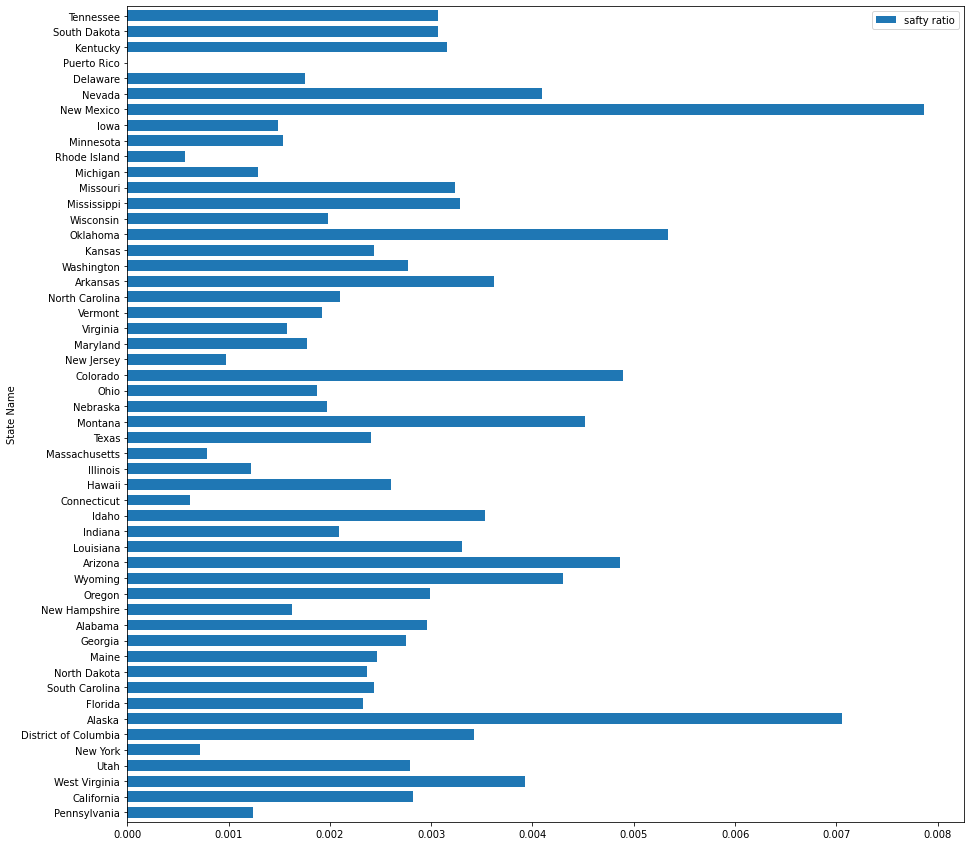

In [1045]:
ax = tempo.plot.barh(y='safty ratio',figsize=(15,15),width = 0.7)

In [1046]:
race = df1['race']

In [1047]:
race

0         A
1         W
2         H
3         W
4         H
       ... 
7677    NaN
7678    NaN
7679    NaN
7680    NaN
7681      B
Name: race, Length: 7682, dtype: object

In [1048]:
race.dropna()

0       A
1       W
2       H
3       W
4       H
       ..
7600    W
7622    W
7654    W
7663    B
7681    B
Name: race, Length: 6244, dtype: object

In [1049]:
race.value_counts()

W    3183
B    1678
H    1127
A     112
N      97
O      47
Name: race, dtype: int64

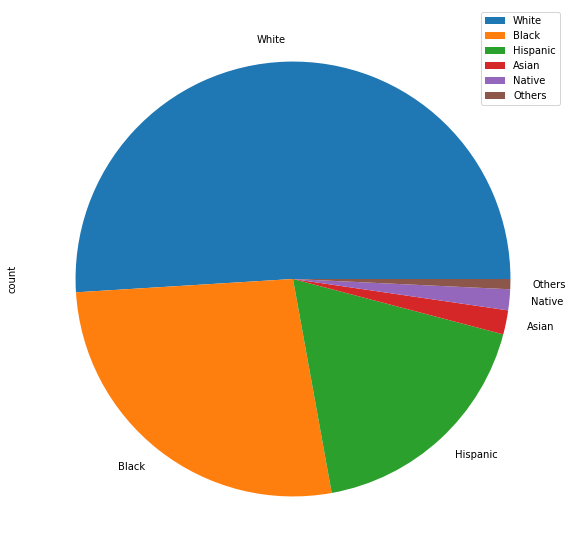

In [1050]:
racepie = pd.DataFrame({'count': [race.value_counts()[0],race.value_counts()[1],race.value_counts()[2],race.value_counts()[3],race.value_counts()[4],race.value_counts()[5]]},index=['White', 'Black', 'Hispanic','Asian','Native','Others'])
plot = racepie.plot.pie(y='count', figsize=(10, 10))

In [1051]:
df1['counts']=1

In [1052]:
fleeing = df1[(df1['flee'] == 'Not fleeing') & (df1['armed'] == 'unarmed')]

In [1053]:
unarmNOTflee = fleeing.groupby('race').sum()
unarmNOTflee['counts']

race
A      4
B     64
H     40
N      2
O      4
W    104
Name: counts, dtype: int64

In [1054]:
unarmNOTflee.index

Index(['A', 'B', 'H', 'N', 'O', 'W'], dtype='object', name='race')

In [1055]:
census_race_pop = census_df.sum().to_frame()
census_race_pop.drop(labels=['state','Native percent','Asian percent',
'White percent',
'Black percent',
'Hispanic percent',
'Others percent',	
'safty ratio'],axis=0)

,0
Total Population,329824950
Native,2694311
Asian,18427519
White,196283090
Black,41595290
Hispanic,62573645
Others,8251095


In [1056]:
census_race_pop.at['Black',0]

41595290

In [1057]:
(unarmNOTflee.at['B','counts']/census_race_pop.at['Black',0])*100000

0.15386357445758883

In [1058]:
(unarmNOTflee.at['W','counts']/census_race_pop.at['White',0])*100000

0.052984696745909186

In [1059]:
fleeing = df1[(df1['flee'] != 'Not fleeing') & (df1['armed'] == 'unarmed')]

In [1060]:
unarmflee = fleeing.groupby('race').sum()
unarmflee['counts']

race
A     4
B    79
H    43
N     5
O     1
W    75
Name: counts, dtype: int64

In [1061]:
(unarmflee.at['B','counts']/census_race_pop.at['Black',0])*100000

0.1899253497210862

In [1062]:
(unarmflee.at['W','counts']/census_race_pop.at['White',0])*100000

0.038210117845607586

In [1063]:
fleeing = df1[(df1['flee'] != 'Not fleeing') & (df1['armed'] != 'unarmed')]

In [1064]:
armflee = fleeing.groupby('race').sum()
armflee['counts']

race
A      27
B     703
H     442
N      42
O      17
W    1124
Name: counts, dtype: int64

In [1065]:
(armflee.at['B','counts']/census_race_pop.at['Black',0])*100000

1.6900952006825773

In [1066]:
(armflee.at['W','counts']/census_race_pop.at['White',0])*100000

0.5726422994461724

In [1067]:
fleeing = df1[(df1['flee'] == 'Not fleeing') & (df1['armed'] != 'unarmed')]

In [1068]:
armNOTflee = fleeing.groupby('race').sum()
armNOTflee['counts']

race
A      77
B     832
H     602
N      48
O      25
W    1880
Name: counts, dtype: int64

In [1069]:
(armNOTflee.at['B','counts']/census_race_pop.at['Black',0])*100000

2.000226467948655

In [1070]:
(armNOTflee.at['W','counts']/census_race_pop.at['White',0])*100000

0.9578002873298969

In [1071]:
raceWise = df1[(df1['threat_level']=='attack')]

In [1074]:
racewiseGrouped = raceWise.groupby('race').sum()
racewiseGrouped['counts']

race
A      59
B    1117
H     655
N      56
O      31
W    2072
Name: counts, dtype: int64